## Next Word Prediction:

### Importing the libraries

In [11]:
import numpy as np
from nltk.tokenize import RegexpTokenizer  #A RegexpTokenizer splits a string into substrings using a regular expression
from keras.models import Sequential, load_model   
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading the dataset

In [2]:
text = open("C:\\Users\\HP\\Desktop\\Internships\\Letsgrow more\\Tasks\\Tasks3\\1661-0.txt" , encoding = 'utf-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Splitting the entire dataset into each word in order without the presence of special characters

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

### Dictionary(<key: value>) with each word form the unique_words list as key and its corresponding position as value

In [4]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

### Feature engineering

In [5]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])
     

['project', 'gutenberg', 's', 'the', 'adventures']
of


### One-Hot encoding

In [6]:

X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1
     

In [7]:
print(X[0][0])

[False False False ... False False False]


### Building the model

In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

### Training

In [9]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
811/811 [==============================] - 117s 142ms/step - loss: 6.6941 - accuracy: 0.0529 - val_loss: 7.2759 - val_accuracy: 0.0538
Epoch 2/10
811/811 [==============================] - 117s 145ms/step - loss: 6.4829 - accuracy: 0.0531 - val_loss: 7.2153 - val_accuracy: 0.0538
Epoch 3/10
811/811 [==============================] - 119s 147ms/step - loss: 6.4381 - accuracy: 0.0540 - val_loss: 7.1650 - val_accuracy: 0.0560
Epoch 4/10
811/811 [==============================] - 119s 147ms/step - loss: 6.3607 - accuracy: 0.0636 - val_loss: 7.1365 - val_accuracy: 0.0654
Epoch 5/10
811/811 [==============================] - 114s 140ms/step - loss: 6.2652 - accuracy: 0.0741 - val_loss: 7.1139 - val_accuracy: 0.0762
Epoch 6/10
811/811 [==============================] - 280s 346ms/step - loss: 6.1757 - accuracy: 0.0844 - val_loss: 7.0110 - val_accuracy: 0.0780
Epoch 7/10
811/811 [==============================] - 112s 138ms/step - loss: 6.1048 - accuracy: 0.0906 - val_loss: 6.9638 -

### Saving the model and loading it back

In [12]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))


In [13]:
history

{'loss': [6.694095611572266,
  6.4828691482543945,
  6.438144683837891,
  6.360673427581787,
  6.265164852142334,
  6.175703525543213,
  6.104757308959961,
  6.047114372253418,
  5.998191833496094,
  5.9511823654174805],
 'accuracy': [0.052901435643434525,
  0.053142376244068146,
  0.053980860859155655,
  0.0635896623134613,
  0.07406586408615112,
  0.0844264104962349,
  0.0906331017613411,
  0.09603986144065857,
  0.0999913290143013,
  0.10533062368631363],
 'val_loss': [7.275886058807373,
  7.215258598327637,
  7.164956569671631,
  7.1364641189575195,
  7.113871097564697,
  7.010951519012451,
  6.963821887969971,
  6.980275630950928,
  6.942049980163574,
  6.8926286697387695],
 'val_accuracy': [0.05382643640041351,
  0.05382643640041351,
  0.056023433804512024,
  0.0653606727719307,
  0.07616257667541504,
  0.07799340784549713,
  0.0812889039516449,
  0.07597949355840683,
  0.08220431953668594,
  0.08311973512172699]}

### Evaluation

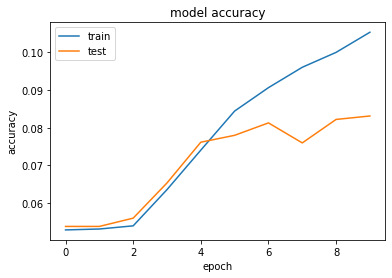

In [14]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

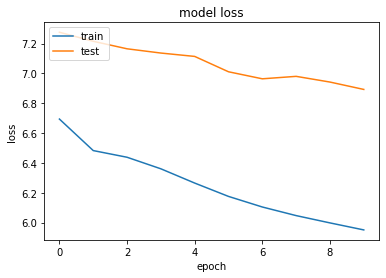

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Prediction

In [16]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [17]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [18]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]
     

In [19]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))


correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['to', 'i', 'it', 'of', 'and']
